# Instalacao

In [1]:
!python -m venv venv

In [2]:
!venv\Scripts\activate

In [ ]:
!pip install -r requirements.txt

In [15]:
!pip freeze > requirements.txt

# Load Scripts

In [16]:
import importlib
import sys
from lib.scripts import *
from lib.models import *

importlib.reload(sys.modules['lib.scripts'])
from lib.scripts import *

importlib.reload(sys.modules['lib.models'])
from lib.models import *

# Carregando e pré-processando os dados com ruído
noise_factor = 0.2
(x_train_noisy, x_train, y_train), (x_val_noisy, x_val, y_val), (x_test_noisy, x_test, y_test) = load_and_preprocess_mnist(noise_factor=noise_factor)

print(f"x_train_noisy shape: {x_train_noisy.shape}, x_train shape: {x_train.shape}")
print(f"x_val_noisy shape: {x_val_noisy.shape}, x_val shape: {x_val.shape}")
print(f"x_test_noisy shape: {x_test_noisy.shape}, x_test shape: {x_test.shape}")

x_train_noisy shape: (48000, 784), x_train shape: (48000, 784)
x_val_noisy shape: (12000, 784), x_val shape: (12000, 784)
x_test_noisy shape: (10000, 784), x_test shape: (10000, 784)


## Routine

In [17]:
import tensorflow as tf
from keras.callbacks import EarlyStopping
from lib.scripts import visualize_data, plot_history, load_and_preprocess_mnist

def Routine(latent_dim, noise_factor=0.0, activity_regularizer=None, k = 0):
    # Carregando e pré-processando os dados
    train, val, test = load_and_preprocess_mnist(noise_factor=noise_factor)

    # Criando o autoencoder
    if k == 0:
        autoencoder = AutoencoderModel((784,), latent_dim, activity_regularizer=activity_regularizer)
    if k > 0:
        autoencoder = SparseAutoencoderModel((784,), latent_dim, k, activity_regularizer=activity_regularizer)

    # Compilando o modelo
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Treinando o autoencoder
    history = autoencoder.fit(train[0], train[1], 
                              epochs=250,
                              batch_size=256,
                              shuffle=False,
                              validation_data=(val[0], val[1]),
                              callbacks=[
                                  EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)])

    # Obtendo os modelos encoder e decoder
    encoder = autoencoder.get_encoder()
    decoder = autoencoder.get_decoder()

    # Codificando e decodificando dados de teste
    encoded_imgs = encoder.predict(test[0])
    decoded_imgs = decoder.predict(encoded_imgs)

    # Avaliando o modelo no conjunto de teste
    test_loss = autoencoder.evaluate(test[0], test[1])
    print(f"Test loss: {test_loss}")

    # Visualizando os dados
    visualize_data(x_original = test[1], 
                   x_noisy = test[0].numpy(), 
                   x_decoded = decoded_imgs, n=10)

    # # Plotando o histórico de treinamento
    # plot_history(history)

    return autoencoder, encoder, decoder, history

# Autoencoders

## Undercomplete Autoencoders

Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3379 - val_loss: 0.1664
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1562 - val_loss: 0.1364
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1312 - val_loss: 0.1235
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1212 - val_loss: 0.1165
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1152 - val_loss: 0.1119
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1106 - val_loss: 0.1085
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1071 - val_loss: 0.1053
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1042 - val_loss: 0.1032
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1021 - val_loss: 0.1016
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1005 - val_loss: 0.1002
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0991 - val_loss: 0.0990
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━

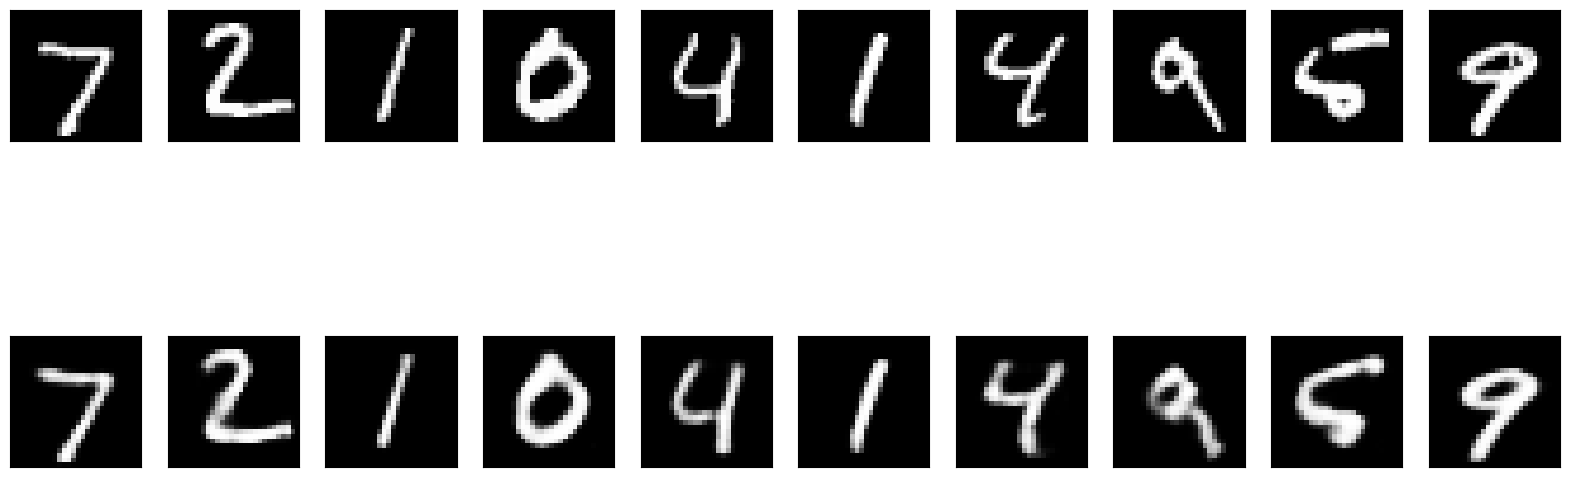

In [18]:
# Exemplo de uso da função
latent_dim = 32
noise_factor = 0.0
activity_regularizer = None

undercomplete_autoencoder, undercomplete_encoder, undercomplete_decoder, undercomplete_history = Routine(latent_dim, noise_factor, activity_regularizer)

## Denoising Autoencoder


Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3471 - val_loss: 0.1838
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1700 - val_loss: 0.1453
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1414 - val_loss: 0.1326
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1306 - val_loss: 0.1252
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1233 - val_loss: 0.1206
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1188 - val_loss: 0.1171
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1154 - val_loss: 0.1142
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1127 - val_loss: 0.1116
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1105 - val_loss: 0.1097
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1085 - val_loss: 0.1082
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1070 - val_loss: 0.1072
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━

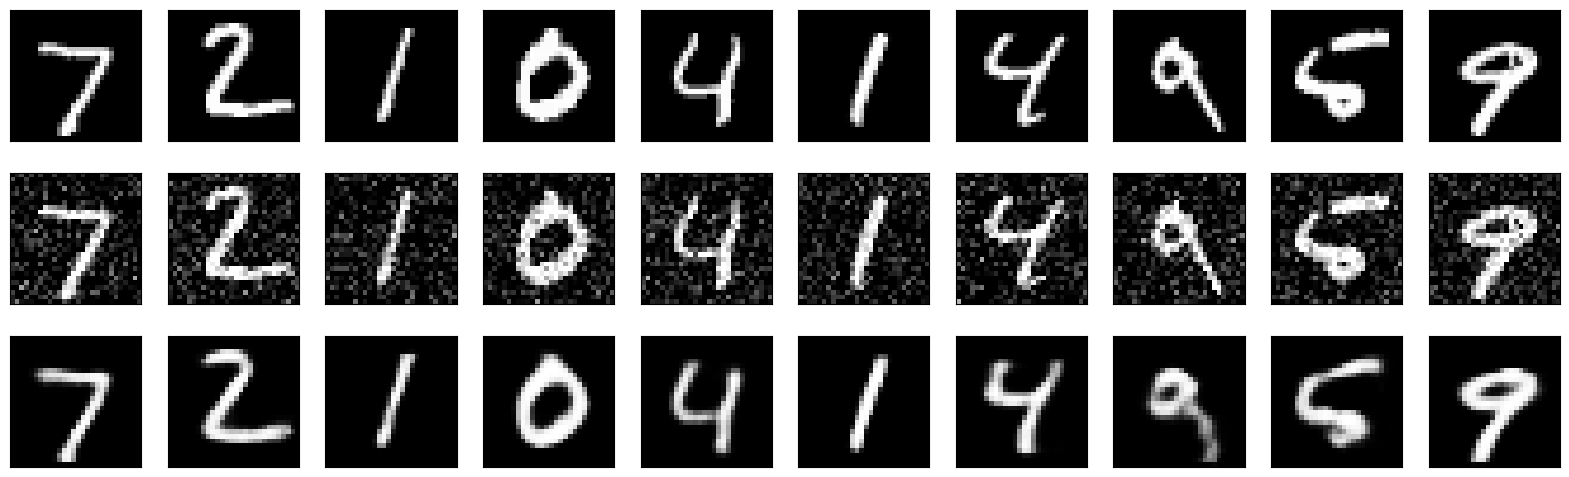

In [28]:
# Exemplo de uso da função
latent_dim = 32
noise_factor = 0.2
activity_regularizer = None

denoising_autoencoder, denoising_encoder, denoising_decoder, denoising_history = Routine(latent_dim, noise_factor, activity_regularizer)

## Sparse Autoencoder


Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3366 - val_loss: 0.1637
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1546 - val_loss: 0.1339
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1301 - val_loss: 0.1219
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1201 - val_loss: 0.1153
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1139 - val_loss: 0.1107
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1096 - val_loss: 0.1076
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1067 - val_loss: 0.1054
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1045 - val_loss: 0.1036
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1027 - val_loss: 0.1020
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1012 - val_loss: 0.1007
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0997 - val_loss: 0.0995
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━

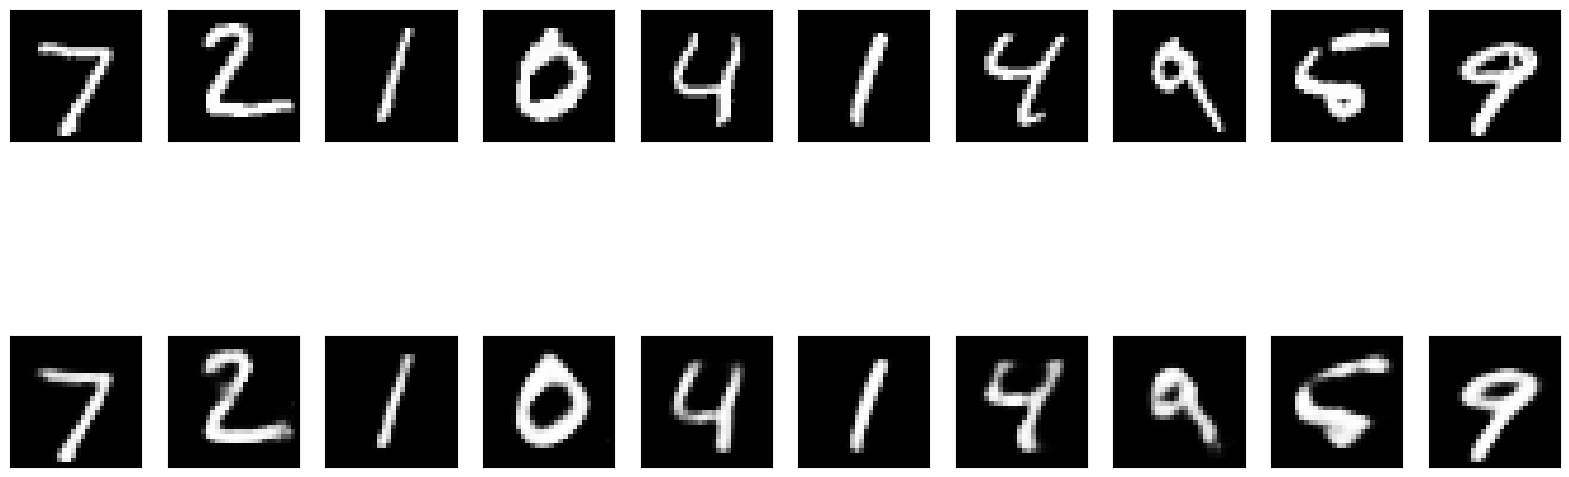

In [29]:
# Exemplo de uso da função
latent_dim = 32
noise_factor = 0.0
activity_regularizer = tf.keras.regularizers.l1(10e-8)

sparse_autoencoder, sparse_encoder, sparse_decoder, sparse_history = Routine(latent_dim, noise_factor, activity_regularizer)

Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3393 - val_loss: 0.1680
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1574 - val_loss: 0.1341
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1305 - val_loss: 0.1224
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1204 - val_loss: 0.1158
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1145 - val_loss: 0.1110
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1100 - val_loss: 0.1075
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1064 - val_loss: 0.1044
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1037 - val_loss: 0.1022
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1017 - val_loss: 0.1006
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1000 - val_loss: 0.0993
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0986 - val_loss: 0.0981
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━

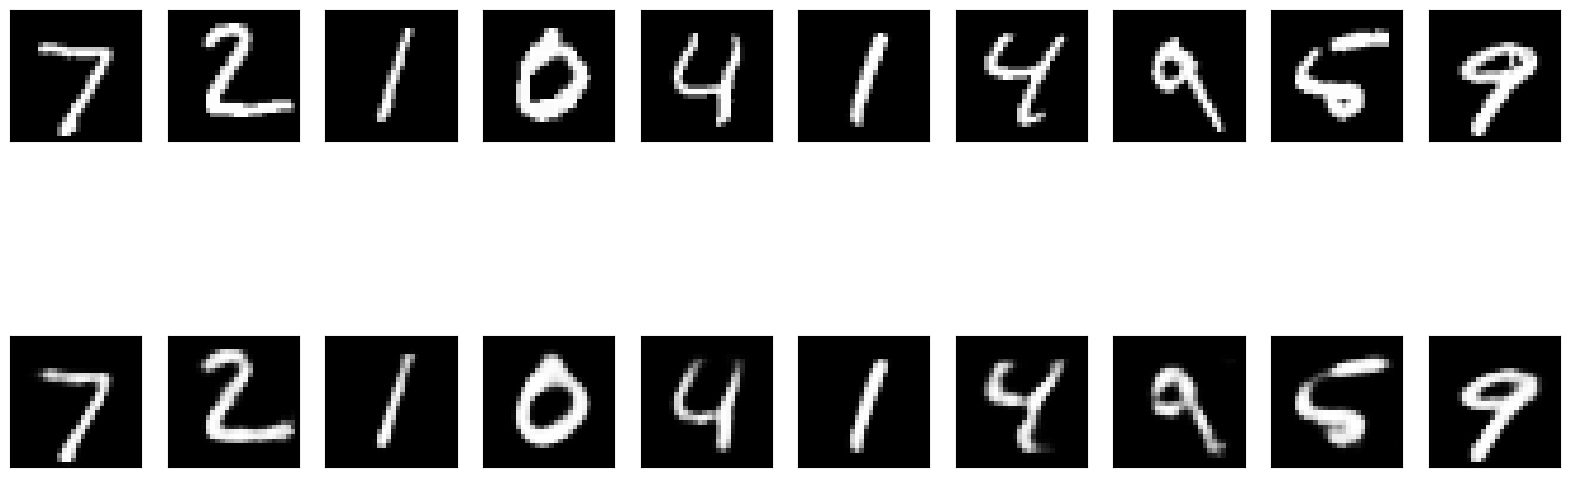

In [30]:
# Exemplo de uso da função
latent_dim = 32
noise_factor = 0.0
activity_regularizer = tf.keras.regularizers.l2(10e-8)

sparsel2_autoencoder, ssparsel2_encoder, sparsel2_decoder, sparsel2_history = Routine(latent_dim, noise_factor, activity_regularizer)

## K-Sparse Autoencoder


Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4798 - val_loss: 0.2422
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2333 - val_loss: 0.2133
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2100 - val_loss: 0.2004
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1981 - val_loss: 0.1894
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1872 - val_loss: 0.1813
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1801 - val_loss: 0.1747
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1738 - val_loss: 0.1696
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1689 - val_loss: 0.1656
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1656 - val_loss: 0.1639
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1633 - val_loss: 0.1608
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1608 - val_loss: 0.1594
Epoch 12/250
188/188 ━━━━━━━━━━━━━━━━━━━━

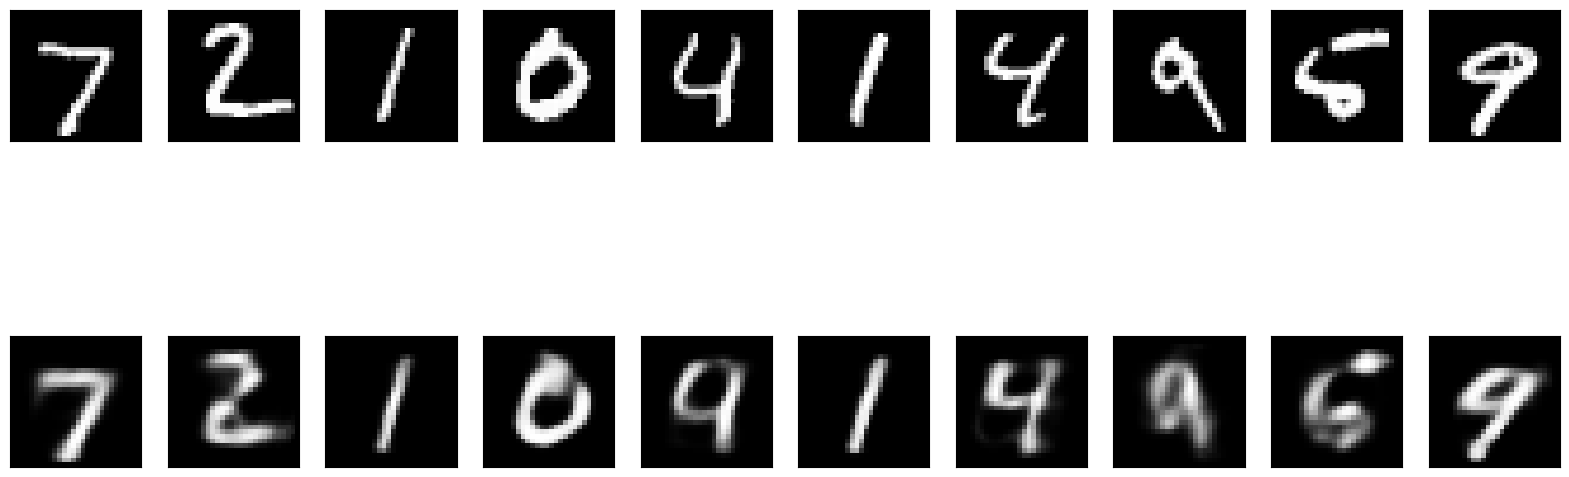

In [34]:
# Exemplo de uso da função
latent_dim = 32
noise_factor = 0.0
k = 5
activity_regularizer = None

ksparse_autoencoder, ksparse_encoder, ksparse_decoder, ksparse_history = Routine(latent_dim, noise_factor, activity_regularizer, k = k)

## Variational Autoencoder


Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 83.7766 - val_loss: 44.8872
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43.4175 - val_loss: 40.5093
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.7366 - val_loss: 37.7220
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37.2445 - val_loss: 36.3302
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36.0244 - val_loss: 35.3072
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.9524 - val_loss: 34.5346
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.2740 - val_loss: 34.0027
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 33.7187 - val_loss: 33.6368
Epoch 9/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.2764 - val_loss: 33.1897
Epoch 10/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.8759 - val_loss: 32.9419
Epoch 11/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.6461 - val_loss: 32.6404
Epoch 12/250
188/18

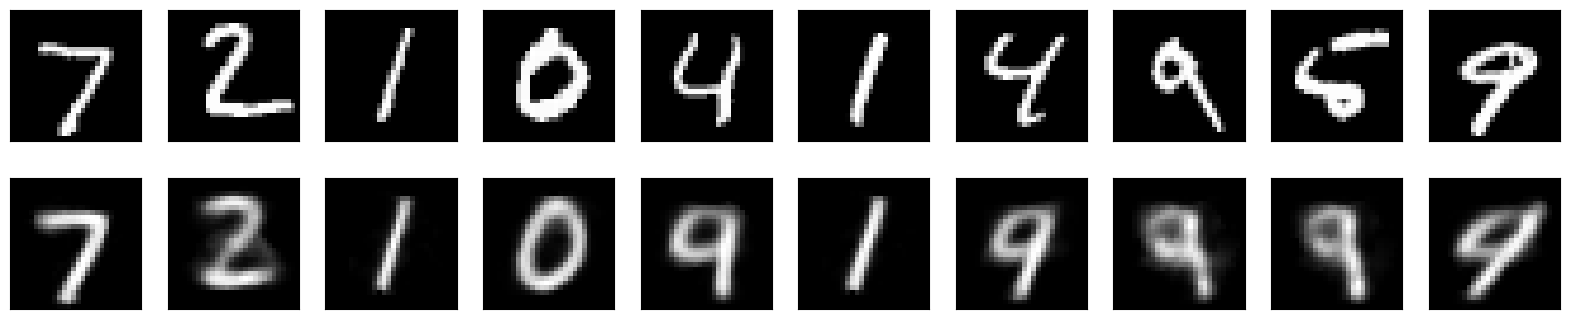

In [91]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Dense, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

class Sampling(Layer):
    """Uses (z_mean, z_log_var) to sample z, the latent vector."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

def build_encoder(input_shape, latent_dim):
    inputs = Input(shape=input_shape)
    x = Dense(140, activation='relu')(inputs)
    x = Dense(84, activation='relu')(x)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
    return encoder

def build_decoder(latent_dim, original_dim):
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = Dense(84, activation='relu')(latent_inputs)
    x = Dense(140, activation='relu')(x)
    outputs = Dense(original_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name='decoder')
    return decoder

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_sum(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1, axis=-1)
        self.add_loss(tf.reduce_mean(kl_loss) / 784)
        return reconstructed

def vae_loss(inputs, outputs):
    reconstruction_loss = mse(inputs, outputs) * 784
    return tf.reduce_mean(reconstruction_loss)

def build_vae(encoder, decoder, input_shape):
    inputs = Input(shape=input_shape)
    vae = VAE(encoder, decoder)
    outputs = vae(inputs)
    vae = Model(inputs, outputs, name='vae')
    vae.compile(optimizer='adam', loss=vae_loss)
    return vae

def load_and_preprocess_mnist_vae():
    (x_train, _), (x_test, _) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

    x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42)

    return x_train, x_val, x_test

def visualize_data(x_original, x_decoded, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Dados originais
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Dados reconstruídos
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x_decoded[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Parâmetros do VAE
input_shape = (784,)
latent_dim = 2

# Construindo o VAE
encoder = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, input_shape[0])
vae = build_vae(encoder, decoder, input_shape)

# Carregando e pré-processando os dados
x_train, x_val, x_test = load_and_preprocess_mnist_vae()

# Treinando o VAE
history = vae.fit(x_train, x_train,
                  epochs=250,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_val, x_val),
                  callbacks=[
                      tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                  ])

# Avaliando o modelo no conjunto de teste
test_loss = vae.evaluate(x_test, x_test)
print(f"Test loss: {test_loss}")

# Gerando dados reconstruídos
x_decoded = vae.predict(x_test)

# Visualizando os dados
visualize_data(x_test, x_decoded, n=10)

# Plotando o histórico de treinamento
# plot_history(history)

# t-SNE of Latent Space


## Undercomplete Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step


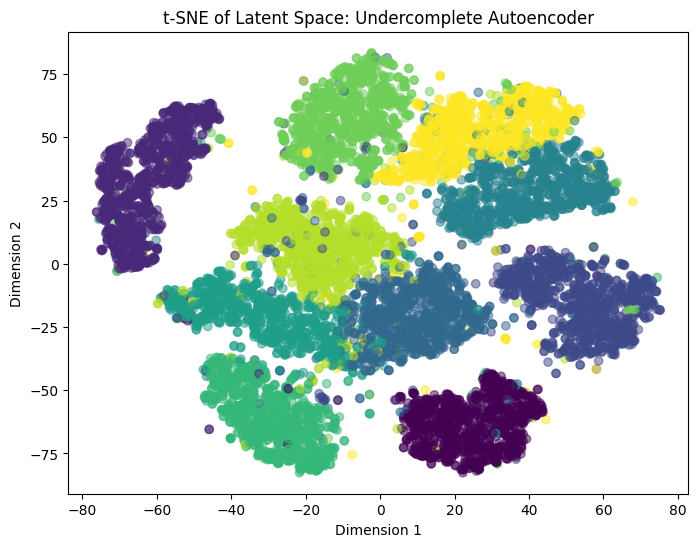

In [85]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_latent_representations(autoencoder, x_test, title):
    # Extrair representações latentes
    encoder = autoencoder.encoder
    latent_representations = encoder.predict(x_test)

    # Usar t-SNE para reduzir as dimensões para 2D
    tsne = TSNE(n_components=2, random_state=42)
    latent_2d = tsne.fit_transform(latent_representations)

    # Visualizar as representações latentes
    plt.figure(figsize=(8, 6))
    plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test, cmap='viridis', alpha=0.5)
    plt.title(f't-SNE of Latent Space: {title}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

# Plotar representações latentes para cada autoencoder
plot_latent_representations(undercomplete_autoencoder, x_test, 'Undercomplete Autoencoder')

## Denoising Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


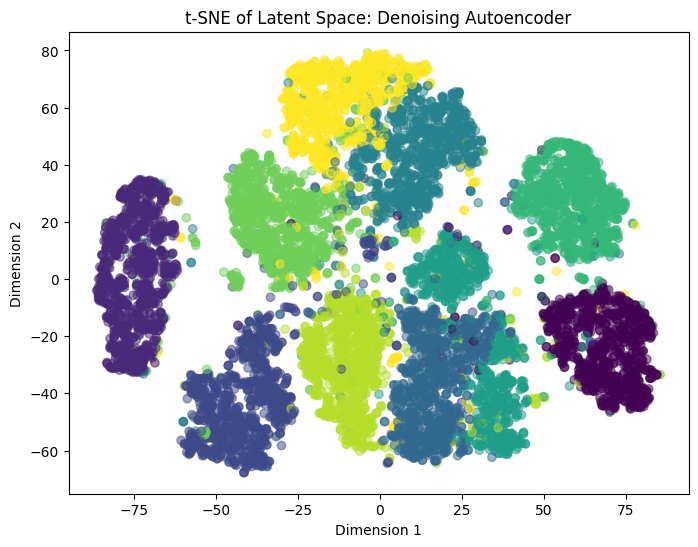

In [86]:
plot_latent_representations(denoising_autoencoder, x_test, 'Denoising Autoencoder')


## Sparse Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step


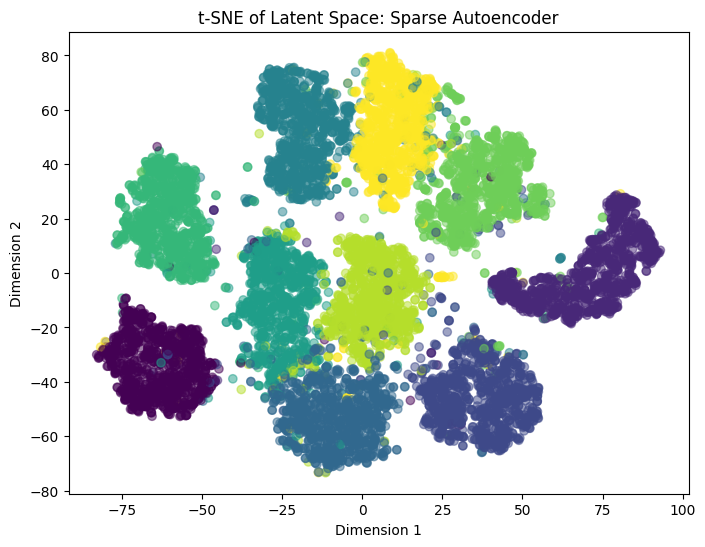

In [87]:
plot_latent_representations(sparse_autoencoder, x_test, 'Sparse Autoencoder')


## Sparse L2 Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


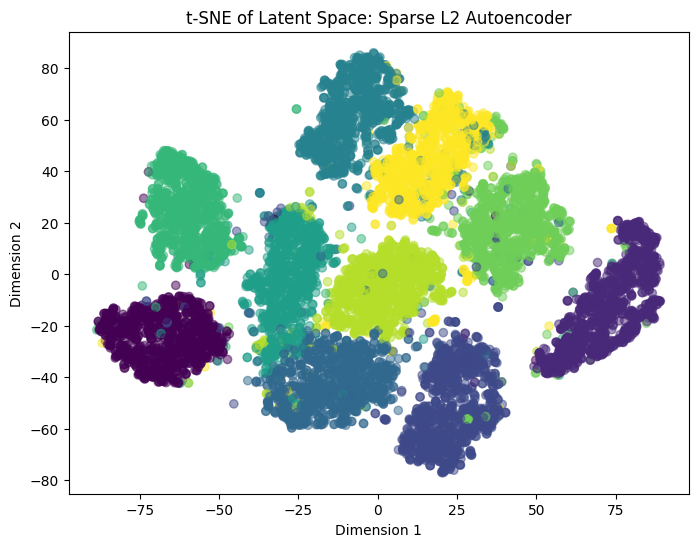

In [88]:
plot_latent_representations(sparsel2_autoencoder, x_test, 'Sparse L2 Autoencoder')


## k-Sparse Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


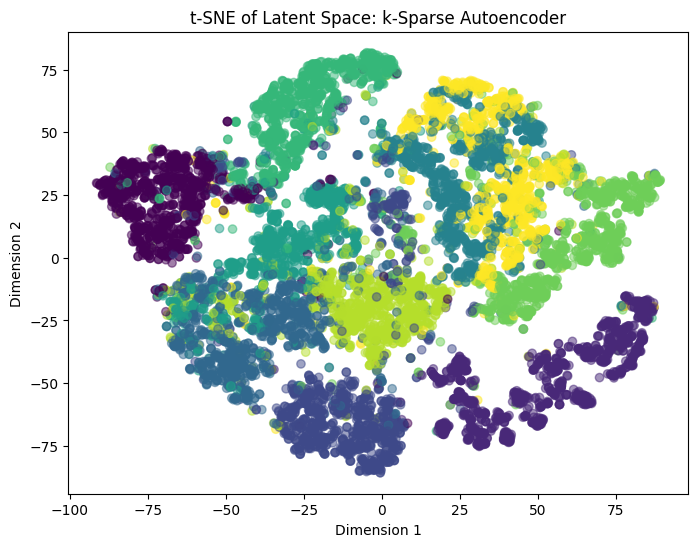

In [89]:
plot_latent_representations(ksparse_autoencoder, x_test, 'k-Sparse Autoencoder')


## Variational Autoencoder

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


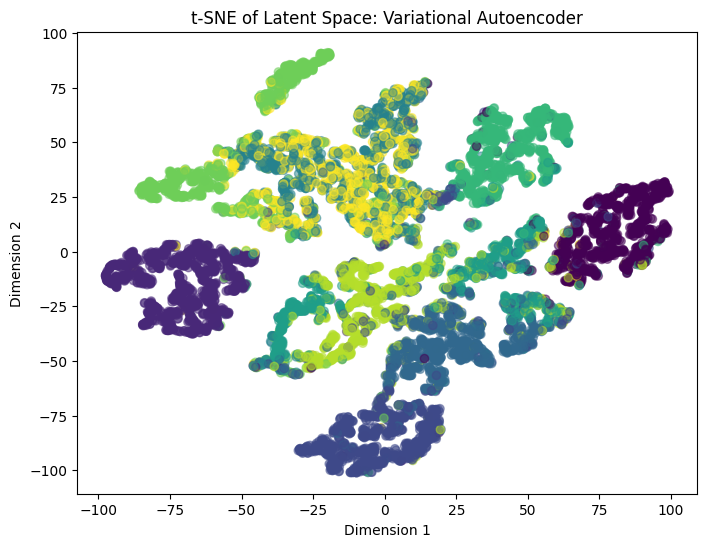

In [93]:
# Extrair representações latentes
_, _, latent_representations = encoder.predict(x_test)

# Usar t-SNE para reduzir as dimensões para 2D
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_representations)

# Visualizar as representações latentes
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.title(f't-SNE of Latent Space: Variational Autoencoder')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Representation Learning


## Classificador

In [39]:
from sklearn.metrics import accuracy_score

train, val, test = load_and_preprocess_mnist(noise_factor=0.0)

# Definir e treinar o classificador
classifier = tf.keras.Sequential([
    layers.InputLayer(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o classificador
history_classifier = classifier.fit(train[1], train[2],
                                    epochs=250,
                                    batch_size=256,
                                    validation_data=(val[1], val[2]),
                                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Avaliar o classificador
test_loss, test_acc = classifier.evaluate(test[1], test[2])
print(f"Classifier test accuracy: {test_acc}")

# Prever rótulos para o conjunto de teste
y_pred = np.argmax(classifier.predict(test[1]), axis=1)

# Calcular e exibir a precisão da classificação
accuracy = accuracy_score(test[2], y_pred)
print(f"Classification accuracy: {accuracy}")

Epoch 1/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7994 - loss: 0.7097 - val_accuracy: 0.9464 - val_loss: 0.1874
Epoch 2/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1646 - val_accuracy: 0.9634 - val_loss: 0.1221
Epoch 3/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9706 - loss: 0.1003 - val_accuracy: 0.9632 - val_loss: 0.1184
Epoch 4/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9795 - loss: 0.0724 - val_accuracy: 0.9717 - val_loss: 0.0943
Epoch 5/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0529 - val_accuracy: 0.9747 - val_loss: 0.0873
Epoch 6/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9755 - val_loss: 0.0828
Epoch 7/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0337 - val_accuracy: 0.9779 - val_loss: 0.0739
Epoch 8/250
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0228 - val_accu

## Undercomplete Autoencoders

In [45]:
def train_and_evaluate_classifier(autoencoder, latent_dim, noise_factor=0):
    # Carregar e preprocessar os dados MNIST
    train, val, test = load_and_preprocess_mnist(noise_factor=noise_factor)

    # Extrair representações latentes
    encoder = autoencoder.encoder
    latent_representations_train = encoder.predict(train[1])
    latent_representations_val = encoder.predict(val[1])
    latent_representations_test = encoder.predict(test[1])

    # Definir e treinar o classificador
    classifier = tf.keras.Sequential([
        layers.InputLayer(shape=(latent_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Treinar o classificador
    history_classifier = classifier.fit(latent_representations_train, train[2],
                                        epochs=50,
                                        batch_size=256,
                                        validation_data=(latent_representations_val, val[2]),
                                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Avaliar o classificador
    test_loss, test_acc = classifier.evaluate(latent_representations_test, test[2])
    print(f"Classifier test accuracy: {test_acc}")

    # Prever rótulos para o conjunto de teste
    y_pred = np.argmax(classifier.predict(latent_representations_test), axis=1)

    # Calcular e exibir a precisão da classificação
    accuracy = accuracy_score(test[2], y_pred)
    print(f"Classification accuracy: {accuracy}")

    return classifier, history_classifier

In [46]:
# Agora usamos o autoencoder treinado para a classificação
classifier, history_classifier = train_and_evaluate_classifier(undercomplete_autoencoder, latent_dim = latent_dim, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6878 - loss: 1.0254 - val_accuracy: 0.9109 - val_loss: 0.2960
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.2406 - val_accuracy: 0.9435 - val_loss: 0.1913
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.1789 - val_accuracy: 0.9470 - val_loss: 0.1748
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9506 - loss: 0.1617 - val_accuracy: 0.9552 - val_loss: 0.1458
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9609 - loss: 0.1233 - val_accuracy: 0.9570 - val_loss: 0.1376
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9637 - loss: 0.1146 - val_accuracy: 0.9632 - val_loss: 0.1205
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1046 - val_accuracy:

## Denoising Autoencoder


In [47]:
classifier, history_classifier = train_and_evaluate_classifier(denoising_autoencoder, latent_dim = latent_dim, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6544 - loss: 1.2613 - val_accuracy: 0.9224 - val_loss: 0.2671
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9214 - loss: 0.2582 - val_accuracy: 0.9362 - val_loss: 0.2122
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9449 - loss: 0.1830 - val_accuracy: 0.9508 - val_loss: 0.1648
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.1606 - val_accuracy: 0.9539 - val_loss: 0.1483
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9597 - loss: 0.1361 - val_accuracy: 0.9600 - val_loss: 0.1301
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9635 - loss: 0.1224 - val_accuracy: 0.9606 - val_loss: 0.1303
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9664 - loss: 0.1088 - val_accuracy:

## Sparse Autoencoder


In [48]:
classifier, history_classifier = train_and_evaluate_classifier(sparse_autoencoder, latent_dim = latent_dim, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.9372 - val_accuracy: 0.9218 - val_loss: 0.2641
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9258 - loss: 0.2420 - val_accuracy: 0.9442 - val_loss: 0.1885
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1691 - val_accuracy: 0.9561 - val_loss: 0.1468
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9596 - loss: 0.1352 - val_accuracy: 0.9600 - val_loss: 0.1348
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1183 - val_accuracy: 0.9653 - val_loss: 0.1140
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.1065 - val_accuracy: 0.9693 - val_loss: 0.1043
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.0924 - val_accuracy:

## K-Sparse Autoencoder


In [49]:
classifier, history_classifier = train_and_evaluate_classifier(ksparse_autoencoder, latent_dim = latent_dim, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7867 - loss: 0.6838 - val_accuracy: 0.9081 - val_loss: 0.2995
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9051 - loss: 0.2909 - val_accuracy: 0.9147 - val_loss: 0.2683
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.2456 - val_accuracy: 0.9184 - val_loss: 0.2553
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9249 - loss: 0.2284 - val_accuracy: 0.9168 - val_loss: 0.2511
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9281 - loss: 0.2203 - val_accuracy: 0.9172 - val_loss: 0.2470
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.2046 - val_accuracy: 0.9209 - val_loss: 0.2466
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9322 - loss: 0.1996 - val_accuracy:

# Greedy Layer-Wise Unsupervised Pretraining


In [79]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import accuracy_score

def extract_latent_representations(autoencoders, data):
    return [autoencoder.encoder.predict(data) for autoencoder in autoencoders]

def freeze_layers_except(classifier, layer_indices_to_train):
    for i, layer in enumerate(classifier.layers):
        if i not in layer_indices_to_train:
            layer.trainable = False
        else:
            layer.trainable = True

def Greedy_Layer_Wise(autoencoders, latent_dim, noise_factor=0):
    # Carregar e preprocessar os dados MNIST
    train, val, test = load_and_preprocess_mnist(noise_factor=noise_factor)

    # Extrair representações latentes de cada autoencoder
    latent_representations_train = extract_latent_representations(autoencoders, train[1])
    latent_representations_val = extract_latent_representations(autoencoders, val[1])
    latent_representations_test = extract_latent_representations(autoencoders, test[1])

    # Preparar os dados de entrada para o classificador
    train_inputs = [latent_representations_train]
    val_inputs = [latent_representations_val]
    test_inputs = [latent_representations_test]

    # Definir entradas múltiplas para o classificador
    inputs = [layers.Input(shape=(latent_dim,)) for _ in range(4)]

    # Concatenar as entradas
    concatenated = layers.concatenate(inputs)

    # Definir o classificador
    x = layers.Dense(256, activation='relu')(concatenated)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(10, activation='softmax')(x)

    classifier = models.Model(inputs=inputs, outputs=output)

    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history_classifier = classifier.fit(train_inputs, train[2],
                                        epochs=50,
                                        batch_size=256,
                                        validation_data=(val_inputs, val[2]),
                                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
    for i in range(4):
        print(f"Training with autoencoder {i+1}")
        # Congelar todas as camadas, exceto a correspondente ao autoencoder atual
        layer_indices_to_train = [0, 1, 2, 3]
        freeze_layers_except(classifier, layer_indices_to_train[i:i+1])

        # Treinar o classificador
        history_classifier = classifier.fit([train_inputs[0][i], train_inputs[0][(i+1)%4], train_inputs[0][(i+2)%4], train_inputs[0][(i+3)%4]], train[2],
                                            epochs=50,
                                            batch_size=256,
                                            validation_data=([val_inputs[0][i], val_inputs[0][(i+1)%4], val_inputs[0][(i+2)%4], val_inputs[0][(i+3)%4]], val[2]),
                                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

        # Avaliar o classificador
        test_loss, test_acc = classifier.evaluate([test_inputs[0][i], test_inputs[0][(i+1)%4], test_inputs[0][(i+2)%4], test_inputs[0][(i+3)%4]], test[2])
        print(f"Classifier test accuracy after training with autoencoder {i+1}: {test_acc}")

        # Prever rótulos para o conjunto de teste
        y_pred = np.argmax(classifier.predict([test_inputs[0][i], test_inputs[0][(i+1)%4], test_inputs[0][(i+2)%4], test_inputs[0][(i+3)%4]]), axis=1)

        # Calcular e exibir a precisão da classificação
        accuracy = accuracy_score(test[2], y_pred)
        print(f"Classification accuracy after training with autoencoder {i+1}: {accuracy}")

    return classifier, history_classifier

In [80]:
classifier, history_classifier = Greedy_Layer_Wise([undercomplete_autoencoder ,
                                                               ksparse_autoencoder, 
                                                               denoising_autoencoder, 
                                                               sparse_autoencoder], latent_dim = 32, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
Training with autoencoder 1
Epoch 1/50
 55/188 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.1004 - loss: 5.5234 

C:\Users\Yasin Mghazli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0993 - loss: 5.5186 - val_accuracy: 0.1015 - val_loss: 5.4749
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0963 - loss: 5.5121 - val_accuracy: 0.1015 - val_loss: 5.4749
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0984 - loss: 5.5365 - val_accuracy: 0.1015 - val_loss: 5.4749
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0990 - loss: 5.5055 - val_accuracy: 0.1015 - val_loss: 5.4749
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0980 - loss: 5.5209 - val_accuracy: 0.1015 - val_loss: 5.4749
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0983 - loss: 5.5537 - val_accuracy: 0.1015 - val_loss: 5.4749
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.0877 - loss: 5.5912
Classifier test accuracy after training with autoencoder 1: 0.09319999814033508
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
Classification accuracy after training with

In [81]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import accuracy_score

def extract_latent_representations(autoencoders, data):
    return [autoencoder.encoder.predict(data) for autoencoder in autoencoders]

def Greedy_Layer_Wise(autoencoder1, autoencoder2, autoencoder3, autoencoder4, latent_dim, noise_factor=0):
    # Carregar e preprocessar os dados MNIST
    train, val, test = load_and_preprocess_mnist(noise_factor=noise_factor)

    # Lista de autoencoders
    autoencoders = [autoencoder1, autoencoder2, autoencoder3, autoencoder4]

    # Extrair representações latentes de cada autoencoder
    latent_representations_train = [extract_latent_representations(autoencoders, train[1])]
    latent_representations_val = [extract_latent_representations(autoencoders, val[1])]
    latent_representations_test = [extract_latent_representations(autoencoders, test[1])]

    # Preparar os dados de entrada para o classificador
    train_inputs = [latent for latent in latent_representations_train[0]]
    val_inputs = [latent for latent in latent_representations_val[0]]
    test_inputs = [latent for latent in latent_representations_test[0]]

    # Definir entradas múltiplas para o classificador
    inputs = [layers.Input(shape=(latent_dim,)) for _ in range(4)]

    # Concatenar as entradas
    concatenated = layers.concatenate(inputs)

    # Definir o classificador
    x = layers.Dense(256, activation='relu')(concatenated)
    x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(10, activation='softmax')(x)

    classifier = models.Model(inputs=inputs, outputs=output)

    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Treinar o classificador
    history_classifier = classifier.fit(train_inputs, train[2],
                                        epochs=50,
                                        batch_size=256,
                                        validation_data=(val_inputs, val[2]),
                                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Avaliar o classificador
    test_loss, test_acc = classifier.evaluate(test_inputs, test[2])
    print(f"Classifier test accuracy: {test_acc}")

    # Prever rótulos para o conjunto de teste
    y_pred = np.argmax(classifier.predict(test_inputs), axis=1)

    # Calcular e exibir a precisão da classificação
    accuracy = accuracy_score(test[2], y_pred)
    print(f"Classification accuracy: {accuracy}")

    return classifier, history_classifier

In [82]:
classifier, history_classifier = Greedy_Layer_Wise(undercomplete_autoencoder ,
                                                               ksparse_autoencoder, 
                                                               denoising_autoencoder, 
                                                               sparse_autoencoder, latent_dim = 32, noise_factor=0.0)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7226 - loss: 1.0631 - val_accuracy: 0.9202 - val_loss: 0.2565
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1979 - val_accuracy: 0.9485 - val_loss: 0.1648
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.1459 - val_accuracy: 0.9592 - val_loss: 0.1344
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9611 - loss: 0.1251 - val_

# Distributed Representation


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


C:\Users\Yasin Mghazli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Yasin Mghazli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^

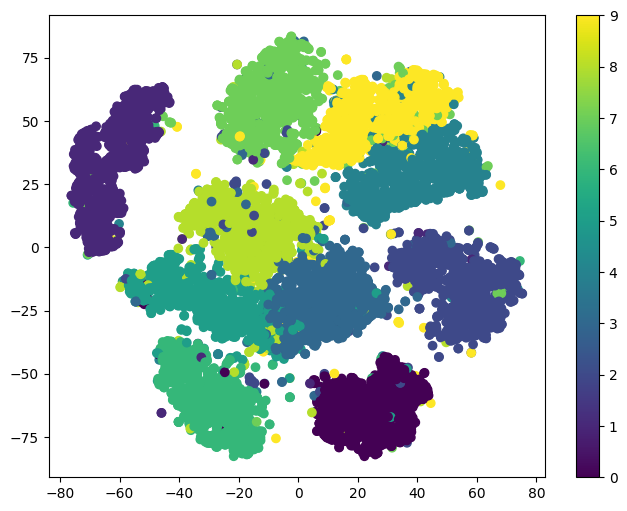

In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

encoder = undercomplete_autoencoder.encoder
latent_representations = encoder.predict(x_test)
    
# Aplicar t-SNE para reduzir as dimensões a 2D para visualização
tsne = TSNE(n_components=2, random_state=42)
representacoes_tsne = tsne.fit_transform(latent_representations)

# Plotar as representações latentes
plt.figure(figsize=(8, 6))
plt.scatter(representacoes_tsne[:, 0], representacoes_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.show()
